In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

### Test with toy model

In [2]:
topology = paths.engines.toy.Topology(n_spatial=3, 
                                      n_atoms=2, 
                                      masses=np.array([2.0, 8.0]), 
                                      pes=None)
initial_snapshot = paths.engines.toy.Snapshot(
    coordinates=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    velocities=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    engine=paths.engines.toy.Engine({}, topology)
)

We'll define the modifier at two different temperatures, and we'll run each for 10000 snapshots. Note also that our two atoms have different masses.

In [3]:
modifier_1 = paths.RandomVelocities(beta=1.0)
modifier_5 = paths.RandomVelocities(beta=1.0/5.0)

In [4]:
snapshots_1 = [modifier_1(initial_snapshot) for i in range(10000)]
snapshots_5 = [modifier_5(initial_snapshot) for i in range(10000)]

Within each atom, all 3 DOFs will be part of the same distribution. We create a few lists with names of the form `v_${BETA}_${ATOM_NUMBER}`. These are the results we'll histogram and test.

In [5]:
v_1_0 = sum([s.velocities[0].tolist() for s in snapshots_1], [])
v_1_1 = sum([s.velocities[1].tolist() for s in snapshots_1], [])
v_5_0 = sum([s.velocities[0].tolist() for s in snapshots_5], [])
v_5_1 = sum([s.velocities[1].tolist() for s in snapshots_5], [])

We know what the distribution should look like, so we write it down explicitly:

In [6]:
def expected(beta, mass, v):
    alpha = 0.5*beta*mass
    return np.sqrt(alpha/np.pi)*np.exp(-alpha*v**2)

Now we take each total distribution, and compare it to the expected distribution. This is where we have to use our eyes to check the correctness.

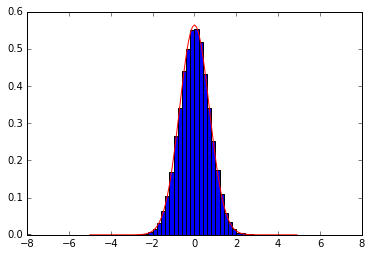

In [7]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_1_0, bins=bins, normed=True)
plt.plot(v, expected(1.0, 2.0, v), 'r');

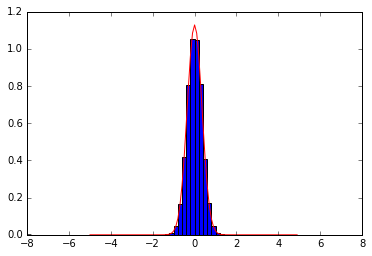

In [8]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_1_1, bins=bins, normed=True)
plt.plot(v, expected(1.0, 8.0, v), 'r');

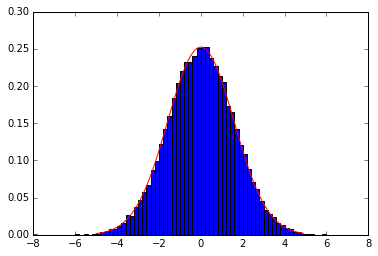

In [9]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_5_0, bins=bins, normed=True)
plt.plot(v, expected(0.2, 2.0, v), 'r');

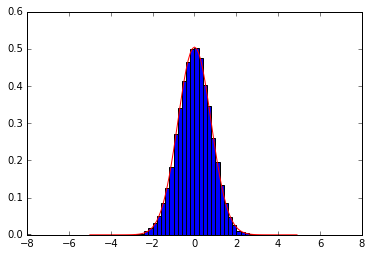

In [10]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_5_1, bins=bins, normed=True)
plt.plot(v, expected(0.2, 8.0, v), 'r');

If the red lines match the blue histograms, we're good. Otherwise, something has gone terribly wrong.

### Test with OpenMM

In [4]:
import openmmtools as omt
import openpathsampling.engines.openmm as omm_engine
import simtk.unit as u
test_system = omt.testsystems.AlanineDipeptideVacuum()
template = omm_engine.snapshot_from_testsystem(test_system)

In [5]:
temperature = 300.0 * u.kelvin
beta = 1.0 / (temperature * u.BOLTZMANN_CONSTANT_kB)

In [6]:
full_randomizer = paths.RandomVelocities(beta)
# also do a carbon-only randomizer

In [11]:
new_snapshot = full_randomizer(template)

In [12]:
new_snapshot.velocities

Quantity(value=array([[ 0.88332117, -0.16694002, -0.17925139],
       [ 0.68811684,  0.12654977, -0.30231329],
       [-0.85859522, -0.44108227, -1.76766825],
       [-2.51577996, -5.08569362,  3.02866427],
       [-0.22189347, -0.30129245, -0.32522871],
       [ 0.10036594, -0.50932488, -0.32341171],
       [-0.36919338,  0.54613176, -0.26228661],
       [-0.11867122,  0.12478625,  1.5383369 ],
       [-0.3159657 ,  0.06584834,  0.06173398],
       [ 2.80805842, -0.05571876,  0.99497806],
       [-0.4297918 ,  0.28902185,  0.34093277],
       [ 0.73163928, -0.16749435, -0.81916028],
       [ 0.45081444, -0.63200482, -1.13519151],
       [-0.77489244,  1.6591497 ,  0.77450732],
       [ 0.17501131, -0.51102709,  0.04308545],
       [-0.01737424,  0.29256713,  0.14945355],
       [ 0.02124409,  0.63447003, -0.22214017],
       [ 0.47543419, -0.01924382, -0.60841439],
       [ 0.18915486,  0.11646116,  0.37587761],
       [-0.53460647, -0.3775619 , -0.765986  ],
       [-0.259523  ,  0.2

In [13]:
template.velocities

Quantity(value=array([[ 0.88332117, -0.16694002, -0.17925139],
       [ 0.68811684,  0.12654977, -0.30231329],
       [-0.85859522, -0.44108227, -1.76766825],
       [-2.51577996, -5.08569362,  3.02866427],
       [-0.22189347, -0.30129245, -0.32522871],
       [ 0.10036594, -0.50932488, -0.32341171],
       [-0.36919338,  0.54613176, -0.26228661],
       [-0.11867122,  0.12478625,  1.5383369 ],
       [-0.3159657 ,  0.06584834,  0.06173398],
       [ 2.80805842, -0.05571876,  0.99497806],
       [-0.4297918 ,  0.28902185,  0.34093277],
       [ 0.73163928, -0.16749435, -0.81916028],
       [ 0.45081444, -0.63200482, -1.13519151],
       [-0.77489244,  1.6591497 ,  0.77450732],
       [ 0.17501131, -0.51102709,  0.04308545],
       [-0.01737424,  0.29256713,  0.14945355],
       [ 0.02124409,  0.63447003, -0.22214017],
       [ 0.47543419, -0.01924382, -0.60841439],
       [ 0.18915486,  0.11646116,  0.37587761],
       [-0.53460647, -0.3775619 , -0.765986  ],
       [-0.259523  ,  0.2

In [14]:
new_snapshot

In [15]:
template

In [16]:
new_snapshot.kinetics

In [17]:
template.kinetics